In [1]:
#분류 시킬 폴더 선택
openFolderPath = 'E:\\00.Storage\\Study\\Programing\\Project\\Img_Process\\Image_List\\border_down_title'
classification = ['border_down_title', 'border_only', 'border_up_title', 'border_upNdown_title', 'white_bg']

#파일 호출
# Python 기본 윈도우 숨기기, jupyter에서 작동 안됨
# root = tk.Tk()
# root.withdraw() 
# openFilePath = filedialog.askdirectory(
#     # filetypes=(("xlsx File", "*.xlsx"), ("xls File", "*.xls")),
#     title='적용파일 불러오기'
# )

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
#구분한 폴더 만들기
import os
import shutil

# #ReSize 된 폴더 존재 확인
# resizeFolderName = os.getcwd() + '\\ApplyResize'
# if os.path.exists(resizeFolderName):
#     shutil.rmtree(resizeFolderName)
# os.mkdir(resizeFolderName)

#구분된 통합폴더 존재 확인
applyFolderName = os.getcwd() + '\\Apply'
if os.path.exists(applyFolderName):
    shutil.rmtree(applyFolderName)
os.mkdir(applyFolderName)

#구분된 하위 폴더 존재 확인
for labelName in classification:
    labelFolder = applyFolderName + '\\' + labelName
    os.mkdir(labelFolder)

#매칭되지 않은 폴더 생성
os.mkdir(applyFolderName + '\\pass')

In [3]:
#이미지 사이즈 수정 및 폴더 저장
import cv2  #OpenCV
import numpy as np

#파일 사이즈 설정 및 수정본 저장
imgList = []
imgAry = []
print(openFolderPath)
for file in os.listdir(openFolderPath):
    #이미지 가져오기
    FocusedFile = openFolderPath + '\\' + file
    img = cv2.imdecode(np.fromfile(FocusedFile, dtype=np.uint8), cv2.IMREAD_COLOR) 

    #파일 Size 1000, 1000 변경
    if (type(img) == np.ndarray) : #꺠진파일 거르기
        if (str(img.shape) != '(1000, 1000, 3)') : 
            print('BfSize :', img.shape)
            img = cv2.resize(img, dsize=(1000,1000), interpolation=cv2.INTER_AREA)
            print('ReSize Image :', file, '/ AfSize :', img.shape)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        imgList.append([file, img])
        imgAry.append(img)
        # cv2.imwrite(resizeFolderName + '\\' + file, img)

imgAry = np.array(imgAry)

E:\00.Storage\Study\Programing\Project\Img_Process\Image_List\border_down_title
BfSize : (600, 600, 3)
ReSize Image : M01DG10205044.jpg / AfSize : (1000, 1000, 3)
BfSize : (600, 600, 3)
ReSize Image : M01DG10205049.jpg / AfSize : (1000, 1000, 3)
BfSize : (600, 600, 3)
ReSize Image : M01DG10205187.jpg / AfSize : (1000, 1000, 3)
BfSize : (600, 600, 3)
ReSize Image : M01DG10236824.jpg / AfSize : (1000, 1000, 3)
BfSize : (600, 600, 3)
ReSize Image : M01DG10322424.jpg / AfSize : (1000, 1000, 3)
BfSize : (600, 600, 3)
ReSize Image : M01DG10375719.jpg / AfSize : (1000, 1000, 3)
BfSize : (600, 600, 3)
ReSize Image : M01DG10465540.jpg / AfSize : (1000, 1000, 3)
BfSize : (600, 600, 3)
ReSize Image : M01DG10465543.jpg / AfSize : (1000, 1000, 3)
BfSize : (600, 600, 3)
ReSize Image : M01DG10811331.jpg / AfSize : (1000, 1000, 3)
BfSize : (600, 600, 3)
ReSize Image : M01DG10875498.jpg / AfSize : (1000, 1000, 3)
BfSize : (600, 600, 3)
ReSize Image : M01DG10890445.jpg / AfSize : (1000, 1000, 3)
BfSize 

In [4]:
#모델 불러오기 및 적용하기
import joblib
path = os.getcwd() + '//Models'
files = os.listdir(path)

fileName = files[len(files) - 1]

from tensorflow import keras
model = keras.models.load_model(path + "\\" + fileName)

# model = joblib.load(path + "\\" + fileName)

#모델 적용
label = model.predict(imgAry)
print(label.shape)





20/20 [==============================] - 199s 9s/step
(625, 5)


In [5]:
# import matplotlib.pyplot as plt
from PIL import Image

minAcc = 0.0 #최소 정확도
saveCnt = 0 #정확도에 적합된 데이터 수

accuaryList = []

for idx in range(len(label)):
    print('Accuray :', label[idx][np.argmax(label[idx])], '/ Result :', classification[np.argmax(label[idx])])
    accuaryList.append(label[idx][np.argmax(label[idx])])

    savePath = applyFolderName + '\\'

    #정확도에 못미치는 결과물들을 pass에 저장
    if(label[idx][np.argmax(label[idx])] > minAcc):
        savePath += classification[np.argmax(label[idx])] + '\\' + imgList[idx][0]
        # print('SavePath :', savePath)
    else:
        savePath += 'pass' + '\\' + imgList[idx][0]

    imgList[idx][1] = Image.fromarray(imgList[idx][1])
    imgList[idx][1].save(savePath)
    saveCnt += 1
    
print('SaveCnt :', saveCnt)

Accuray : 0.893984 / Result : border_down_title
Accuray : 0.91501933 / Result : white_bg
Accuray : 0.9424531 / Result : white_bg
Accuray : 0.9836394 / Result : border_down_title
Accuray : 0.63638216 / Result : border_down_title
Accuray : 0.6257789 / Result : white_bg
Accuray : 0.621813 / Result : border_down_title
Accuray : 0.6300808 / Result : border_down_title
Accuray : 0.79948056 / Result : border_down_title
Accuray : 0.479406 / Result : white_bg
Accuray : 0.55323154 / Result : white_bg
Accuray : 0.5221867 / Result : white_bg
Accuray : 0.52132106 / Result : white_bg
Accuray : 0.4684467 / Result : border_down_title
Accuray : 0.4746797 / Result : white_bg
Accuray : 0.6847077 / Result : border_down_title
Accuray : 0.42827767 / Result : border_down_title
Accuray : 0.63306653 / Result : white_bg
Accuray : 0.6607965 / Result : white_bg
Accuray : 0.55323154 / Result : white_bg
Accuray : 0.644468 / Result : white_bg
Accuray : 0.87779385 / Result : border_down_title
Accuray : 0.90985715 / Re

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


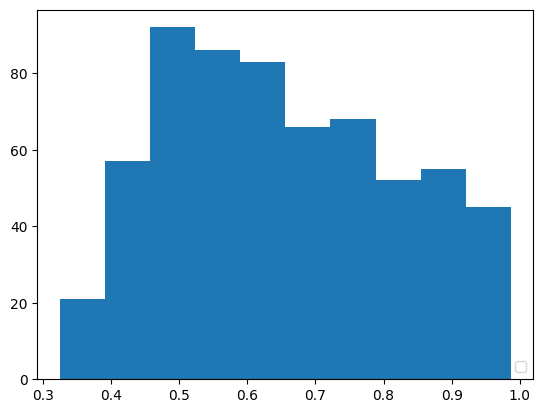

In [6]:
#정확도 분포표보기
import matplotlib.pyplot as plt
plt.hist(accuaryList)

plt.legend(loc='lower right')
plt.show()

e:\00.Storage\Study\Programing\Project\Img_Process//Models\20240108_1143
